# Geometry Unions

- silently dissolves geometries of touching polygons in the same group using `union_all()` for each group

To combine two or more groups of a GeoDataFrame into one geometry, either:
- use a combined condition
- concatenate seperate subsets and then dissolve with `union_all()` 

In [10]:
import geopandas as gpd
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
from helpers import us_states

In [4]:
regions = (us_states[['REGION', 'geometry', 'total_pop_15']]
           .dissolve(by='REGION', 
                     aggfunc='sum').reset_index()
)
regions

,REGION,geometry,total_pop_15
0,Midwest,"MULTIPOLYGON (((-89.10077 36.94397, -89.19948 ...",67546398.0
1,Norteast,"MULTIPOLYGON (((-75.61724 39.83423, -75.7886 3...",55989520.0
2,South,"MULTIPOLYGON (((-81.3855 30.27384, -81.25671 2...",118575377.0
3,West,"MULTIPOLYGON (((-118.36998 32.83927, -118.4963...",72264052.0


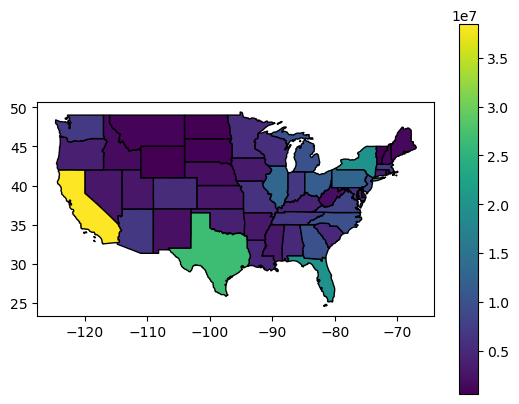

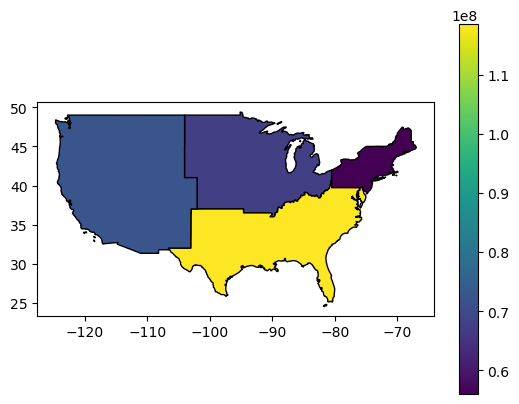

In [5]:
ax = us_states.plot(ec='k', column='total_pop_15', 
              legend=True); 
ax = regions.plot(ec='k', column='total_pop_15', legend=True);

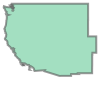

In [6]:
us_west = us_states[us_states.REGION == 'West']
us_west_union = us_west.geometry.union_all() 
us_west_union

>Dissolve groups of a GeoDataFrame

>Approach 1

In [9]:
sel = (us_states.REGION == 'West') | (us_states.NAME == 'Texas')
texas_union = us_states[sel]
texas_union = texas_union.geometry.union_all()

>Approach 2

In [12]:
us_west = us_states[us_states.REGION == 'West']
texas = us_states[us_states.NAME == 'Texas']
texas_union = pd.concat([us_west, texas]).union_all()

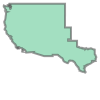

In [13]:
texas_union